In [ ]:
import pandas as pd

In [9]:
df = pd.read_csv('data/data.csv', quoting=1)  # quoting=1 means QUOTE_ALL
df.head()

,text
0,— Пусть все сучки сосут мой член. Пусть все уб...
1,"YG Woods\nHolla , oops, man, я сделал это сно..."
2,"Утекай, в подворотне нас ждет маньяк\nХочет на..."
3,"Передаю привет всем своим братьям, эй\nИногда ..."
4,"That be YG Woods, ho\nМысли за гранью\nСказал,..."


In [11]:
print("DataFrame shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nFirst 5 rows:")
print(df.head())

print("\nBasic statistics for text column:")
print("Number of unique texts:", df['text'].nunique())
print("Average text length:", df['text'].str.len().mean())
print("Max text length:", df['text'].str.len().max())
print("Min text length:", df['text'].str.len().min())


DataFrame shape: (200, 1)

Missing values per column:
 text    6
dtype: int64

First 5 rows:
                                                text
0  — Пусть все сучки сосут мой член. Пусть все уб...
1  YG Woods\nHolla  , oops, man, я сделал это сно...
2  Утекай, в подворотне нас ждет маньяк\nХочет на...
3  Передаю привет всем своим братьям, эй\nИногда ...
4  That be YG Woods, ho\nМысли за гранью\nСказал,...

Basic statistics for text column:
Number of unique texts: 191
Average text length: 1774.1494845360826
Max text length: 4223.0
Min text length: 4.0


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords = stopwords.words("russian")

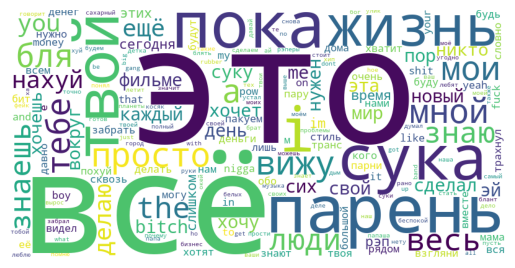

In [27]:
text = ' '.join(df['text'].dropna().astype(str)).replace('\\n', ' ').lower()

# Generate a word cloud object, skipping stopwords and \n
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    collocations=False,
    stopwords=stopwords
).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [31]:
total_words = df['text'].dropna().str.split().apply(len).sum()
print("Total number of words:", total_words)

all_words = ' '.join(df['text'].dropna().astype(str)).lower().split()
unique_words = set(all_words)
print("Number of unique words:", len(unique_words))

Total number of words: 52994
Number of unique words: 16654


In [33]:
from collections import Counter


filtered_words = [word for word in all_words if word not in stopwords and word.isalpha()]
word_counts = Counter(filtered_words)
print("Top 10 most common words (excluding stopwords):")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")

Top 10 most common words (excluding stopwords):
это: 321
всё: 208
твой: 115
a: 98
жизнь: 96
вижу: 94
пока: 94
the: 88
весь: 82
мной: 77


In [34]:
text_lengths = df['text'].dropna().str.split().apply(len)
print("Average text length (in words):", text_lengths.mean())
print("Max text length (in words):", text_lengths.max())
print("Min text length (in words):", text_lengths.min())

Average text length (in words): 273.16494845360825
Max text length (in words): 688
Min text length (in words): 1
